In [1]:
import hoomd
import hoomd.hpmc
import ex_render
import math
import random
from scipy.spatial import distance_matrix
from shapely.geometry import Polygon
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
hoomd.context.initialize("--mode=cpu")
from freud import parallel, box, density, order
parallel.setNumThreads(2)
from bokeh.io import output_notebook
output_notebook()
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import gridplot
import numpy as np
from scipy import stats, polyfit
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
from matplotlib import cm
import freud
import xlwt

def polygon(n, a, alpha0, p0):
    l = []
    p = [0, a]
    p = [p[0]*math.cos(alpha0) - p[1]*math.sin(alpha0), p[1]*math.cos(alpha0) + p[0]*math.sin(alpha0)]
    alpha = 2*math.pi/n
    for i in range(n):
        p = [p[0]*math.cos(alpha) - p[1]*math.sin(alpha), p[1]*math.cos(alpha) + p[0]*math.sin(alpha)]
        l.append([p[0]+p0[0], p[1]+p0[1]])
    return l

def hex_flake_step(old_line):
    new_line = []
    for i in range(len(old_line)-1):
        p1 = old_line[i]
        p2 = old_line[i+1]
        dpx = (p2[0] - p1[0])/3.0
        dpy = (p2[1] - p1[1])/3.0
        new_line.append(p1)
        p3 = [p1[0]+dpx, p1[1]+dpy]
        p4 = [p1[0]+2*dpx, p1[1]+2*dpy]
        alpha = math.pi/3.0
        p = [(p2[0]-p1[0])/3.0, (p2[1]-p1[1])/3.0]
        p5 = [p[0]*math.cos(alpha) - p[1]*math.sin(alpha), p[1]*math.cos(alpha) + p[0]*math.sin(alpha)]
        p5 = [p5[0] + p3[0], p5[1] + p3[1]]
        new_line.append(p3)
        new_line.append(p5)
        new_line.append(p4)
    p1 = old_line[-1]
    p2 = old_line[0]
    dpx = (p2[0] - p1[0])/3.0
    dpy = (p2[1] - p1[1])/3.0
    new_line.append(p1)
    p3 = [p1[0]+dpx, p1[1]+dpy]
    p4 = [p1[0]+2*dpx, p1[1]+2*dpy]
    alpha = math.pi/3.0
    p = [(p2[0]-p1[0])/3.0, (p2[1]-p1[1])/3.0]
    p5 = [p[0]*math.cos(alpha) - p[1]*math.sin(alpha), p[1]*math.cos(alpha) + p[0]*math.sin(alpha)]
    p5 = [p5[0] + p3[0], p5[1] + p3[1]]
    new_line.append(p3)
    new_line.append(p5)
    new_line.append(p4)
    #new_line.append(old_line[-1])
    new_line = np.array(new_line)
    return new_line

def GetPhi(r, it):
    ######
    vertex = []
    rad_hex = r
    rho = rad_hex**2
    #Hexagon1
    p_hex1 = [0, 0.5*rad_hex, 0]
    hex1_line = polygon(6, rad_hex, 0, p_hex1[0:2])
    hex_line = np.copy(hex1_line)
    for i in range(it):
        hex_line = hex_flake_step(hex_line)
    vertex.append(hex1_line)
    hex1 = Polygon(hex_line)
    #Cell hexagon
    hex_cell_line = polygon(6, 1, 0, p_hex1[0:2])
    hex_cell = Polygon(hex_cell_line)
    phi = hex1.area/hex_cell.area
    ######
    return phi

def GetSquare(r, it):
    ######
    vertex = []
    rad_hex = r
    rho = rad_hex**2
    #Hexagon1
    p_hex1 = [0, 0.5*rad_hex, 0]
    hex1_line = polygon(6, rad_hex, 0, p_hex1[0:2])
    hex_line = np.copy(hex1_line)
    for i in range(it):
        hex_line = hex_flake_step(hex_line)
    vertex.append(hex1_line)
    hex1 = Polygon(hex_line)
    ######
    return hex1.area

HOOMD-blue 2.3.1 DOUBLE HPMC_MIXED SSE SSE2 SSE3 
Compiled: 06/07/18
Copyright 2009-2018 The Regents of the University of Michigan.
-----
You are using HOOMD-blue. Please cite the following:
* J A Anderson, C D Lorenz, and A Travesset. "General purpose molecular dynamics
  simulations fully implemented on graphics processing units", Journal of
  Computational Physics 227 (2008) 5342--5359
* J Glaser, T D Nguyen, J A Anderson, P Liu, F Spiga, J A Millan, D C Morse, and
  S C Glotzer. "Strong scaling of general-purpose molecular dynamics simulations
  on GPUs", Computer Physics Communications 192 (2015) 97--107
-----
-----
You are using HPMC. Please cite the following:
* J A Anderson, M E Irrgang, and S C Glotzer. "Scalable Metropolis Monte Carlo
  for simulation of hard shapes", Computer Physics Communications 204 (2016) 21
  --30
-----
HOOMD-blue is running on the CPU


Loading BokehJS ...

In [4]:
n = 2
print("ITER = " + str(n))
rel = GetSquare(1, n)/GetSquare(1, 0)
print("PHI = " + str(0.686*rel) + " for fluid-hexatic")
print("PHI = " + str(0.708*rel) + " for hexatic-solid")

ITER = 2
PHI = 0.575901234567901 for fluid-hexatic
PHI = 0.5943703703703701 for hexatic-solid


In [6]:
for i in range(1,12):
    print "i = " + str(i) + "; phi = " + str(GetSquare(1, i)/GetSquare(1, 0))

i = 1; phi = 0.888888888889
i = 2; phi = 0.83950617284
i = 3; phi = 0.81755829904
i = 4; phi = 0.807803688462
i = 5; phi = 0.803468305983
i = 6; phi = 0.801541469326
i = 7; phi = 0.800685097478
i = 8; phi = 0.800304487768
i = 9; phi = 0.800135327898
i = 10; phi = 0.800060145732
i = 11; phi = 0.800026731436


In [8]:
0.708*0.8000

0.5664

# HEXATIC ORDER (BOND PARAMETER)

In [22]:
GetPhi(0.841, 1)
len(tr)

100

In [25]:
#HEX_ANGLES
r = 0.841
it = 1
phi = GetPhi(r, it)
rmax = 3
k = 6
hex_order = freud.order.HexOrderParameter(rmax = rmax, k = k, n = k)
fname = "/Users/user/Documents/Work/2017_HexMC/hex_flake_" + str(r) + "_" + str(it) + ".gsd"
tr = ex_render.get_trajectory(fname)
# compute the hex order
psi_array = np.zeros(len(tr[0].particles.position), dtype='complex128')
count = 0
#for fn in [-1]:
for fn in range(len(tr)):
    p_index = 0
    tid = tr[fn].particles.typeid == p_index
    pos = tr[fn].particles.position[tid, 0:3]
    pos[:, 2] = 0
    # create box
    fbox = box.Box(Lx=tr[fn].configuration.box[0], Ly=tr[fn].configuration.box[1], is2D=True)
    # compute hex order order for 6 nearest neighbors
    hex_order.compute(fbox, pos)
    psi_array += hex_order.getPsi()
    count += 1
psi_array /= count                        

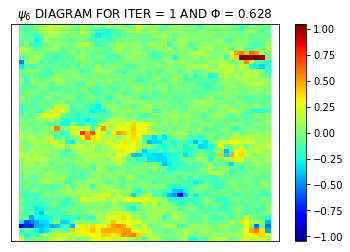

In [26]:
nk = 4
hex_order_array = np.angle(psi_array) - np.angle(np.mean(psi_array))
hex_order_array = hex_order_array[::nk]
x = pos[::nk, 0]
y = pos[::nk, 1]
xmin = x.min()
ymin = y.min()
xmax = x.max()
ymax = y.max()
xi = np.linspace(xmin, xmax, 50)
yi = np.linspace(ymin, ymax, 50)
XI, YI = np.meshgrid(xi, yi)
rbf = Rbf(x, y, hex_order_array, epsilon=5)
ZI = rbf(XI, YI)
plt.pcolormesh(XI, YI, ZI, cmap=cm.jet)
plt.colorbar()
plt.clim(-np.pi/3, np.pi/3)
plt.xticks([])
plt.yticks([])

#it = 2
#phi = GetPhi(r, it)

plt.title('$\psi_6$ DIAGRAM FOR ITER = ' + str(it) + ' AND ' + '$\Phi$ = ' + str(phi)[0:5])
plt.axes().set_aspect(0.5, 'datalim')

# HEXATIC CORRELATION FUNCTION

In [44]:
g6ij_mas = np.outer(psi_array[::nk], np.conj(psi_array[::nk]))
rij_mas = distance_matrix(pos[::nk, :], pos[::nk, :])
dr = 0.5
r_mas = []
g6_mas = []
for r in np.arange(1.0, 20, 0.5):
    inds = (rij_mas > r - dr)*(rij_mas < r + dr)*(rij_mas > 0.0)
    g6_mas.append(np.mean(g6ij_mas[inds]))
    r_mas.append(r)

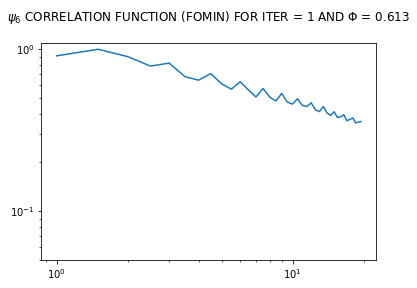

-0.378012859112


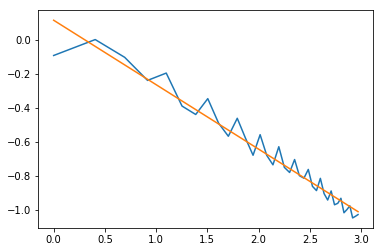

In [45]:
g6_mas1 = np.abs(np.array(g6_mas))
r_mas1 = np.array(r_mas)
inds = ~np.isnan(g6_mas1)
g6_mas1 = g6_mas1[inds] / np.max(g6_mas1[inds])
r_mas1 = r_mas1[inds]
#g6_mas1 += 0.05*r_mas1
plt.plot(r_mas1, g6_mas1)
plt.xscale('log')
plt.yscale('log')
plt.ylim((0.05,1.1))
plt.title('$\psi_6$ CORRELATION FUNCTION (FOMIN) FOR ITER = ' + str(it) + ' AND ' + '$\Phi$ = ' + str(phi)[0:5] + "\n")
plt.show()
xx = np.log(r_mas1)
yy = np.log(g6_mas1)
b = ~np.isnan(yy)
yy = yy[b]
xx = xx[b]
(a_s,b_s,r,tt,stderr)=stats.linregress(xx,yy)
plt.plot(xx, yy, xx, a_s*xx + b_s)
print a_s
plt.show()
wb = xlwt.Workbook()
ws = wb.add_sheet('sheet1')
ws.write(0, 0, "r")
ws.write(0, 1, "g6")
for i in range(0, len(g6_mas1)):
    ws.write(i+1, 0, r_mas1[i])
    ws.write(i+1, 1, g6_mas1[i])
wb.save("G6 (Iter = " + str(it) + "; Phi = " + str(phi)[0:5] + ").xls")

# HEXATIC CORRELATION FUNCTION LIKE GLOTZER

In [21]:
def PsiL(K):
    x = pos[:, 0]
    y = pos[:, 1]
    xmin = x.min()
    ymin = y.min()
    xmax = x.max()
    ymax = y.max()
    dx = (xmax - xmin)/float(K)
    dy = (ymax - ymin)/float(K)
    psiL = 0
    for ix in range(K):
        for iy in range(K):
            xinds = (x > dx*ix) * (x < dx*(ix+1))
            yinds = (y > dy*iy) * (y < dy*(iy+1))
            hex_order_array1 = psi_array[xinds*yinds]
            hex_order_array1 = hex_order_array1[~np.isnan(hex_order_array1)]
            if len(hex_order_array1) > 0:
                psiL += np.abs(np.mean(hex_order_array1))
    return psiL/K**2

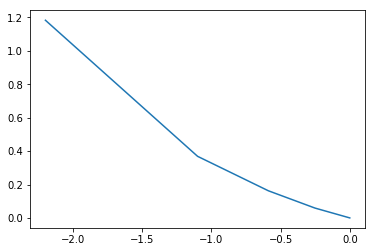

In [22]:
Kmas = np.array(range(1,10,2),dtype='int32')
Psimas = []
for K in Kmas:
    Psimas.append(PsiL(K))
Psimas = np.array(Psimas)
#Kmas = np.log(Kmas/float(Kmas[-1]))
#Psimas = np.flip(np.log(Psimas/Psimas[0]),0)
plt.plot(np.log(Kmas/float(Kmas[-1])), np.log(Psimas/Psimas[-1]))
plt.show()

In [213]:
len(psi_array)

32768

# TRANSLATION ORDER (POSITION PARAMETER)

In [270]:
r = 0.841
it = 1
phi = GetPhi(r, it)
rmax = 10
k = 6
pos_order = freud.order.TransOrderParameter(rmax = rmax, k = k, n = k)
fname = "/Users/user/Documents/Work/2017_HexMC/hex_flake_" + str(r) + "_" + str(it) + ".gsd"
tr = ex_render.get_trajectory(fname)
# compute the hex order
dr_array = np.zeros(len(tr[0].particles.position), dtype='complex128')
for fn in [-1]:
#for fn in range(len(tr)):
    p_index = 0
    tid = tr[fn].particles.typeid == p_index
    pos = tr[fn].particles.position[tid, 0:3]
    pos[:, 2] = 0
    orient = tr[fn].particles.orientation
    # create box
    fbox = box.Box(Lx=tr[fn].configuration.box[0], Ly=tr[fn].configuration.box[1], is2D=True)
    # compute positional order order for 6 nearest neighbors
    # pos_order.compute(fbox, pos, orient)
    # dr_array += pos_order.getDr()
    count = 1000
    for i in range(count):
        xx = np.random.uniform(-1,1)
        yy = np.random.uniform(-1/np.cos(np.pi/6),1/np.cos(np.pi/6))
        dr_array += np.exp(-1j*(xx*pos[:, 1] + yy*pos[:, 2]))
dr_array /= len(tr)*count  

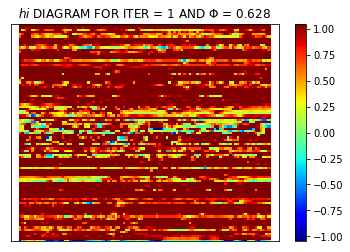

In [271]:
nk = 4
pos_order_array = np.angle(dr_array) - np.angle(np.mean(dr_array))
#pos_order_array = dr_array
pos_order_array = pos_order_array[::nk]
x = pos[::nk, 0]
y = pos[::nk, 1]
xmin = x.min()
ymin = y.min()
xmax = x.max()
ymax = y.max()
xi = np.linspace(xmin, xmax, 100)
yi = np.linspace(ymin, ymax, 100)
XI, YI = np.meshgrid(xi, yi)
rbf = Rbf(x, y, np.abs(pos_order_array), epsilon=2)
ZI = rbf(XI, YI)
plt.pcolormesh(XI, YI, ZI, cmap=cm.jet)
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.clim(-np.pi/3, np.pi/3)
plt.title('$hi$ DIAGRAM FOR ITER = 1 AND ' + '$\Phi$ = ' + str(phi)[0:5])
plt.axes().set_aspect(0.5, 'datalim')

# POSITIONAL CORRELATION FUNCTION

In [272]:
c6ij_mas = np.outer(dr_array[::nk], np.conj(dr_array[::nk]))
rij_mas = distance_matrix(pos[::nk, :], pos[::nk, :])
dr = 0.5
r_mas = []
c6_mas = []
for r in np.arange(3.0, 10, 0.5):
    inds = (rij_mas > r - dr)*(rij_mas < r + dr)*(rij_mas > 0.0)
    c6_mas.append(np.mean(c6ij_mas[inds]))
    r_mas.append(r)

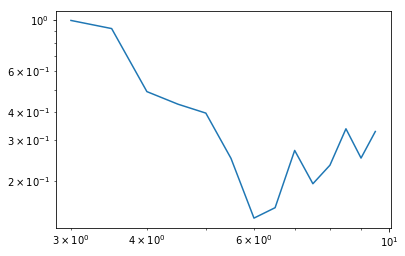

-1.15860914921


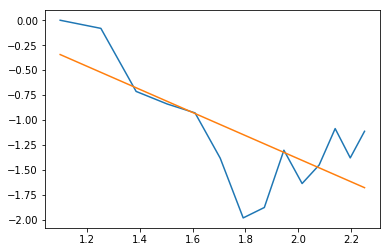

In [273]:
c6_mas1 = np.abs(np.array(c6_mas))
r_mas1 = np.array(r_mas)
inds = ~np.isnan(c6_mas1)
c6_mas1 = c6_mas1[inds] / np.max(c6_mas1[inds])
r_mas1 = r_mas1[inds]
plt.plot(np.array(r_mas1), c6_mas1)
plt.xscale('log')
plt.yscale('log')
#plt.ylim((0.0005,2))
plt.show()
xx = np.log(r_mas1)
yy = np.log(np.abs(np.array(c6_mas1)))
b = ~np.isnan(yy)
yy = yy[b]
xx = xx[b]
(a_s,b_s,r,tt,stderr)=stats.linregress(xx,yy)
plt.plot(xx, yy, xx, a_s*xx + b_s)
print a_s
plt.show()

In [389]:
GetPhi(0.825,1)

0.6049999999999998

# ПОДГОН

In [199]:
GetPhi(0.835, 2)

0.5853246913580248

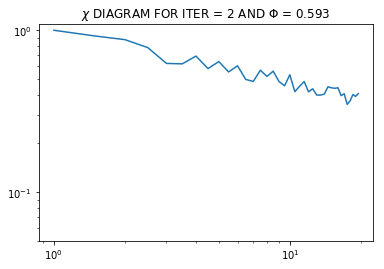

-0.331990678031


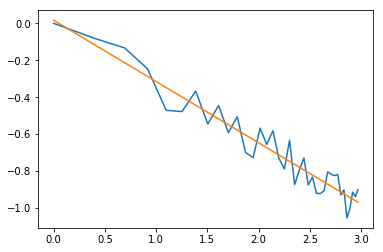

In [209]:
# For it = 2
# etta = -0.3 and alpha = 0.006 and rr=0.841
# etta = -0.33 and alpha = 0.01 and rr=0.835
# etta = -0.45 and alpha = 0.018 and rr=0.83
# etta = -0.5 and alpha = 0.022 and rr=0.828
# etta = -0.6 and alpha = 0.03 and rr=0.825
# For it = 1
# etta = -0.05 and alpha = 0.004 and rr=0.85
# etta = -0.3 and alpha = 0.006 and rr=0.841
# etta = -0.5 and alpha = 0.02 and rr=0.835
# etta = -0.5 and alpha = 0.022 and rr=0.829
# etta = -0.6 and alpha = 0.03 and rr=0.825
it = 2
etta = -0.3
alpha = 0.006
rr = 0.841
phi=GetPhi(rr, it)
r_mas = np.arange(1, 20, 0.5)
c6_mas = np.abs(r_mas**(etta*np.exp(alpha*r_mas)))
np.random.seed((int)(132*it*rr))
c6_rand = c6_mas*np.random.uniform(low=0.0, high=0.3,size=(len(r_mas)))
c6_mas = (c6_mas + c6_rand)
c6_mas /= np.max(c6_mas)
plt.plot(r_mas, c6_mas)
plt.xscale('log')
plt.yscale('log')
plt.ylim((0.05,1.1))
plt.title('$\chi$ DIAGRAM FOR ITER = ' + str(it) + ' AND ' + '$\Phi$ = ' + str(phi)[0:5])
plt.show()
xx = np.log(r_mas)
yy = np.log(c6_mas)
b = ~np.isnan(yy)
yy = yy[b]
xx = xx[b]
(a_s,b_s,r,tt,stderr)=stats.linregress(xx,yy)
plt.plot(xx, yy, xx, a_s*xx + b_s)
print a_s
plt.show()
wb = xlwt.Workbook()
ws = wb.add_sheet('sheet1')
ws.write(0, 0, "r")
ws.write(0, 1, "c6")
for i in range(0, len(c6_mas)):
    ws.write(i+1, 0, r_mas[i])
    ws.write(i+1, 1, c6_mas[i])
wb.save("C6 (Iter = " + str(it) + "; Phi = " + str(phi)[0:5] + ").xls")

# LOCAL DENSITY

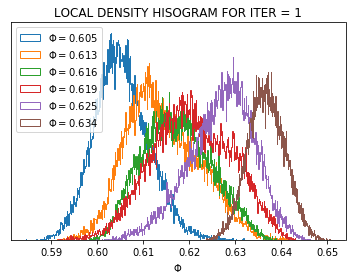

In [8]:
rmas = [0.825, 0.831, 0.833, 0.835, 0.839, 0.845]
#rmas = [0.817, 0.82, 0.824, 0.826, 0.836, 0.84]
#rmas = [0.825, 0.827, 0.83, 0.839]
#LOCAL_DENSITIES
it = 1
wb = xlwt.Workbook()
ws = wb.add_sheet('sheet1')
k = 0
for r in rmas:
    ######
    vertex = []
    rad_hex = r
    rho = rad_hex**2
    #Hexagon1
    p_hex1 = [0, 0.5*rad_hex, 0]
    hex1_line = polygon(6, rad_hex, 0, p_hex1[0:2])
    hex_line = np.copy(hex1_line)
    for i in range(it):
        hex_line = hex_flake_step(hex_line)
    vertex.append(hex1_line)
    hex1 = Polygon(hex_line)
    #Cell hexagon
    hex_cell_line = polygon(6, 1, 0, p_hex1[0:2])
    hex_cell = Polygon(hex_cell_line)
    phi = hex1.area/hex_cell.area
    ######
    fname = "/Users/user/Documents/Work/2017_HexMC/hex_flake_" + str(r) + "_" + str(it) + ".gsd"
    tr = ex_render.get_trajectory(fname)
    p_index = 0
    tid = tr[-1].particles.typeid == p_index
    pos = tr[-1].particles.position[tid, :]
    fbox = box.Box(Lx=tr[-1].configuration.box[0], Ly=tr[-1].configuration.box[1], is2D=True)
    # create hexatic order parameter object
    l_density = density.LocalDensity(r_cut=20.0, volume=hex1.area, diameter=r);
    # compute local density
    l_density.compute(fbox, pos)
    # get values from freud object
    particle_densities = l_density.getDensity()
    plt.hist(particle_densities, bins=500, histtype='step', label='$\Phi = $' + str(phi)[0:5])
    hist, bin_edges = np.histogram(particle_densities, bins=500)
    ws.write(0, k, "Phi = " + str(phi)[0:5])
    for i in range(len(hist)):
        ws.write(i+1, k, bin_edges[i])
        ws.write(i+1, k+1, hist[i])
    k += 2    
plt.yticks([])
plt.legend(loc = 'upper left')
plt.xlabel("$\Phi$")
plt.title("LOCAL DENSITY HISOGRAM FOR ITER = 1")
#plt.axes().set_aspect(2, 'datalim')
plt.show()
wb.save("LOCAL DENSITY HISTOGRAMS (Iter = " + str(it) +").xls")

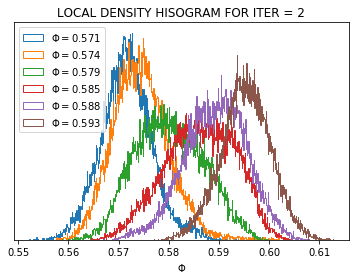

In [4]:
rmas = [0.825, 0.827, 0.831, 0.835, 0.837, 0.841]
#LOCAL_DENSITIES
it = 2
wb = xlwt.Workbook()
ws = wb.add_sheet('sheet1')
k = 0
for r in rmas:
    ######
    vertex = []
    rad_hex = r
    rho = rad_hex**2
    #Hexagon1
    p_hex1 = [0, 0.5*rad_hex, 0]
    hex1_line = polygon(6, rad_hex, 0, p_hex1[0:2])
    hex_line = np.copy(hex1_line)
    for i in range(it):
        hex_line = hex_flake_step(hex_line)
    vertex.append(hex1_line)
    hex1 = Polygon(hex_line)
    #Cell hexagon
    hex_cell_line = polygon(6, 1, 0, p_hex1[0:2])
    hex_cell = Polygon(hex_cell_line)
    phi = hex1.area/hex_cell.area
    ######
    #if r == 0.839 or r == 0.841:
    #    fname = "/Users/user/Documents/Work/2017_HexMC/hex_flake_" + str(r) + "_" + str(1) + ".gsd"
    #else:
    fname = "/Users/user/Documents/Work/2017_HexMC/hex_flake_" + str(r) + "_" + str(it) + ".gsd"
    tr = ex_render.get_trajectory(fname)
    p_index = 0
    tid = tr[-1].particles.typeid == p_index
    pos = tr[-1].particles.position[tid, :]
    fbox = box.Box(Lx=tr[-1].configuration.box[0], Ly=tr[-1].configuration.box[1], is2D=True)
    # create hexatic order parameter object
    l_density = density.LocalDensity(r_cut=20.0, volume=hex1.area, diameter=r);
    # compute local density
    l_density.compute(fbox, pos)
    # get values from freud object
    particle_densities = l_density.getDensity()
    plt.hist(particle_densities, bins=500, histtype='step', label='$\Phi = $' + str(phi)[0:5])
    hist, bin_edges = np.histogram(particle_densities, bins=500)
    ws.write(0, k, "Phi = " + str(phi)[0:5])
    for i in range(len(hist)):
        ws.write(i+1, k, bin_edges[i])
        ws.write(i+1, k+1, hist[i])
    k += 2 
plt.yticks([])
plt.legend(loc = 'upper left')
plt.xlabel("$\Phi$")
plt.title("LOCAL DENSITY HISOGRAM FOR ITER = " + str(it))
#plt.axes().set_aspect(2, 'datalim')
plt.show()
wb.save("LOCAL DENSITY HISTOGRAMS (Iter = " + str(it) +").xls")

# COMPUTE MSD

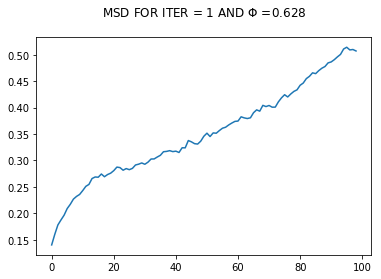

In [69]:
r = 0.841
it = 1
phi = GetPhi(r, it)
fname = "/Users/user/Documents/Work/2017_HexMC/1/hex_flake_" + str(r) + "_" + str(it) + ".gsd"
tr = ex_render.get_trajectory(fname)
p_index = 0
tid = tr[0].particles.typeid == p_index
n_par = len(tr[0].particles.position[tid, 0])
pos0 = np.copy(tr[0].particles.position[tid, 0:2])
Lx=tr[0].configuration.box[0]
Ly=tr[0].configuration.box[1]
frame_begin = 1
frame_end = len(tr)
frame_period = 1
msd = []
for i in range(frame_begin, frame_end):
    pos = tr[i].particles.position[tid, 0:2]
    dx = pos[:, 0] - pos0[:, 0]
    dy = pos[:, 1] - pos0[:, 1]
    indsx = np.abs(dx) < Lx/2
    indsy = np.abs(dy) < Ly/2
    inds = indsx * indsy
    msd.append(np.mean(dy[inds]**2 + dx[inds]**2))
plt.plot(msd)
plt.title("MSD FOR ITER = " + str(it) + " AND " + "$\Phi$ ="  + str(phi)[0:5] + "\n")
plt.show()
wb = xlwt.Workbook()
ws = wb.add_sheet('sheet1')
ws.write(0, 0, "msd")
for i in range(0, len(msd)):
    ws.write(i+1, 0, float(msd[i]))
wb.save("MSD (Iter = " + str(it) + "; Phi = " + str(phi)[0:5] + ").xls")

In [9]:
GetPhi(0.845, 1)

0.6346888888888887